# Neural Networks with Toy example

출처: https://github.com/Harry24k/Pytorch-Basic

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Generate Data

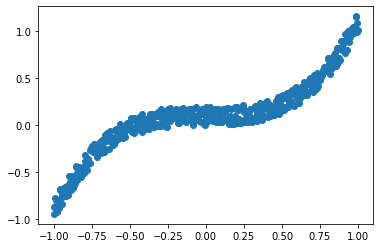

In [27]:
x = torch.linspace(-1, 1, 500)
y = x.pow(3) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [28]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [29]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

## 2. Define Model

In [35]:
hidden1 = nn.Linear(1, 32, bias=True)
activation1 = nn.ReLU()

hidden2 = nn.Linear(32, 64, bias=True)
activation2 = nn.ReLU()

hidden3 = nn.Linear(64, 10, bias=True)
activation3 = nn.ReLU()

output = nn.Linear(10, 1, bias=True)

In [31]:
model = nn.Sequential(
    hidden1, 
    activation1,
    hidden2, 
    activation2,
    hidden3, 
    activation3,
    output
)

In [36]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 3. Train Model

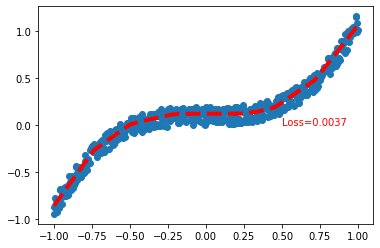

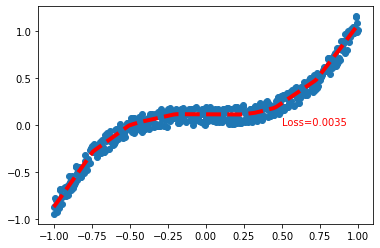

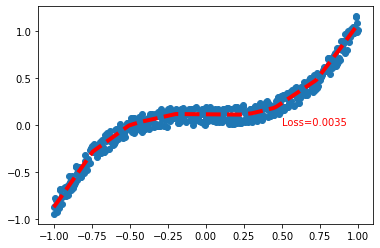

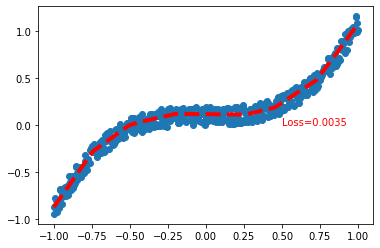

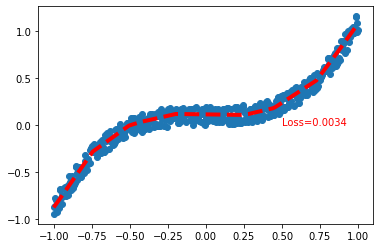

In [37]:
for step in range(2000):
    pre = model(x) ## hidden에 activation 있을때와 없을 때
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 400  == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=4)
        plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
        plt.show()